### Missing value guideline
- https://www.kaggle.com/alexisbcook/missing-values

In [1]:
# Basic library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Feature Selection
from scipy.stats import chi2_contingency

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
import sys
import numpy as np
import matplotlib
import seaborn as sns
import tqdm
import sklearn
import pandas


print ( "Python", sys.version )
print ( "Numpy", np.__version__ )
print ( "Matplotlib", matplotlib.__version__ )
print ( "Seaborn", sns.__version__ )
print ( "tqdm", tqdm.__version__ )
print ( "scikit-learn", sklearn.__version__ )
print ( "pandas", pandas.__version__ )



Python 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy 1.17.3
Matplotlib 3.0.3
Seaborn 0.9.0
tqdm 4.40.0
scikit-learn 0.22.1
pandas 0.25.3


In [3]:
# Set dataframe display
pd.set_option('display.max_columns', None)  # default = 20
pd.set_option('display.expand_frame_repr', False) # default = True
pd.set_option('display.max_colwidth', -1) # default = 50
pd.set_option('display.max_rows', None) # default = 60
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
def percent_countplot(df, col_name, col_hue = None, order_by_value = False, topn = 20, dropna = True,
                      orient = 'v', annot_percent = True, figsize = (14,8)):
    
    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Fill Paramter
    fs = 16 # Font size
    x_data = df.copy()
    x_col = col_name # column to count
    x_hue = col_hue # For divide column
    tittle = 'Distribution by '+x_col

    matplotlib.rc('xtick', labelsize = fs-2)     
    matplotlib.rc('ytick', labelsize = fs-2)
    fig = plt.figure(figsize= figsize)
    
    data_col = x_data   
        
    # topn > 0 we will combine the rest as "Other"
    if topn:
        counts = data_col[x_col].value_counts()
        topn_name = counts.nlargest(topn).index
        data_col[x_col] = data_col[x_col].where(data_col[x_col].isin(topn_name), other = 'Other')
    elif topn == 0:
        topn = data_col[x_col].nunique()
        
    # arrange order by value or index?
    if order_by_value :
        counts = data_col[x_col].value_counts()
        max_count = max(counts) # for adjust text alignment
    else:
        if str in list(map(type,data_col[x_col])) or not dropna:
            data_col[x_col] = data_col[x_col].astype(str)
        counts = data_col[x_col].value_counts().sort_index()
        max_count = max(counts.iloc[:topn]) # for adjust text alignment
        
    if orient == 'v':
        ax = sns.countplot(x = x_col, hue = x_hue, data= data_col, order = counts.iloc[:topn+1].index)
        ax.set_xlabel(x_col, color = 'r', fontsize = fs, fontweight='bold')
        ax.set_ylabel('Frequency', color = 'b', fontsize = fs, fontweight='bold')
        # Set rotation of xticks if name is too long
        data_col[x_col] = data_col[x_col].astype(str)
        xrot = 15 if max(list(map(len,data_col[x_col].unique()))) > 10 else 0
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    elif orient == 'h':
        ax = sns.countplot(y = x_col, hue = x_hue, data= data_col, order = counts.iloc[:topn+1].index)
        ax.set_ylabel(x_col, color = 'b', fontsize = fs, fontweight='bold')
        ax.set_xlabel('Frequency', color = 'r', fontsize = fs, fontweight='bold')
        xrot = 0
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
    total_count = sum(counts) # for calculate percentage
    # print(counts)
    
    # fig.suptitle('test title', fontsize=12)
    ax.set_title(tittle, fontsize = fs, fontweight='bold' )

    plt.xticks(rotation=xrot, color='r', size=16)
    plt.yticks(rotation=0, color='b', size=16)
    
    if x_hue == None and orient == 'v':
        for i, v in enumerate(counts[:topn+1]):
            ax.text(x = i, y=v + max_count*0.01 , s='{:,}'.format(v), horizontalalignment='center', color='black', fontweight='bold')
            if annot_percent:
                ax.text(x = i, y= v/2, s=str('{:.2f}'.format(v*100/total_count))+'%',
                        color='yellow', fontweight='bold', size = 14,
                        horizontalalignment='center', 
                        verticalalignment='center' 
                        )
    elif x_hue == None and orient == 'h':
        for i, v in enumerate(counts[:topn+1]):
            ax.text(x = v + max_count*0.03, y=i , s='{:,}'.format(v), horizontalalignment='center', color='black', fontweight='bold')
            if annot_percent:
                ax.text(x = v/2, y=i , s=str('{:.2f}'.format(v*100/total_count))+'%',
                        color='yellow', fontweight='bold', size = 14,
                        horizontalalignment='center', 
                        verticalalignment='center' 
                        )
    return ax

In [5]:
str in list(map(type,['text', 1, 2.00]))

True

In [6]:
df = pd.read_csv('DrugAllergyKaggle_v3_050720.csv')
df = df.sort_values(by = 'Patient_ID').reset_index(drop=True); df.head()

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
0,2,1,26,2504,0.000,nan,nan,31.000,1,0.000,0,0,0.000,0.000,2,2.000,2,nan
1,7,0,75,1868,51.000,5.000,2.000,1.000,0,0.000,0,0,0.000,0.000,2,6.000,4,1.000
2,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,1,nan
3,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,3,nan
4,18,1,60,3136,0.000,nan,nan,nan,0,0.000,0,0,1.000,1.000,3,8.000,1,nan


In [7]:
df[df.Drug_Rechallenge_Result.isnull()].head()

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
0,2,1,26,2504,0.000,nan,nan,31.000,1,0.000,0,0,0.000,0.000,2,2.000,2,nan
2,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,1,nan
3,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,3,nan
4,18,1,60,3136,0.000,nan,nan,nan,0,0.000,0,0,1.000,1.000,3,8.000,1,nan
5,18,1,60,3136,0.000,nan,nan,nan,0,0.000,0,0,1.000,1.000,3,8.000,1,nan


In [8]:
df.Drug_Rechallenge_Result.value_counts(dropna=False)

nan      685
0.000    86 
1.000    28 
Name: Drug_Rechallenge_Result, dtype: int64

In [9]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
n_uniq = df.nunique()
print ("\nUnique values :  \n",n_uniq)
print ("\nTotal Unique values :  {:,}".format(n_uniq.values.sum()))

Rows     :  799
Columns  :  18

Features : 
 ['Patient_ID', 'Gender', 'Age_Year', 'ELISpot_Control', 'ELISpot_Result', 'Naranjo_Score', 'Naranjo_Category', 'Exposure_Time', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group', 'Drug_Rechallenge_Result']

Missing values :   1582

Unique values :  
 Patient_ID                 298
Gender                     2  
Age_Year                   94 
ELISpot_Control            261
ELISpot_Result             77 
Naranjo_Score              13 
Naranjo_Category           4  
Exposure_Time              77 
Steroid_Usage              2  
Underlying_Condition_A     2  
Underlying_Condition_B     2  
Underlying_Condition_C     2  
Underlying_Condition_D     2  
Underlying_Condition_E     2  
Suspicion_Score            3  
Allergic_Reaction_Group    8  
Drug_Group                 8  
Drug_Rechallenge_Resu

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 18 columns):
Patient_ID                 799 non-null int64
Gender                     799 non-null int64
Age_Year                   799 non-null int64
ELISpot_Control            799 non-null int64
ELISpot_Result             798 non-null float64
Naranjo_Score              431 non-null float64
Naranjo_Category           509 non-null float64
Exposure_Time              622 non-null float64
Steroid_Usage              799 non-null int64
Underlying_Condition_A     781 non-null float64
Underlying_Condition_B     799 non-null int64
Underlying_Condition_C     799 non-null int64
Underlying_Condition_D     785 non-null float64
Underlying_Condition_E     798 non-null float64
Suspicion_Score            799 non-null int64
Allergic_Reaction_Group    771 non-null float64
Drug_Group                 799 non-null int64
Drug_Rechallenge_Result    114 non-null float64
dtypes: float64(9), int64(9)
memory usage: 112.5 

In [11]:
df.isnull().sum()/len(df) * 100

Patient_ID                0.000 
Gender                    0.000 
Age_Year                  0.000 
ELISpot_Control           0.000 
ELISpot_Result            0.125 
Naranjo_Score             46.058
Naranjo_Category          36.295
Exposure_Time             22.153
Steroid_Usage             0.000 
Underlying_Condition_A    2.253 
Underlying_Condition_B    0.000 
Underlying_Condition_C    0.000 
Underlying_Condition_D    1.752 
Underlying_Condition_E    0.125 
Suspicion_Score           0.000 
Allergic_Reaction_Group   3.504 
Drug_Group                0.000 
Drug_Rechallenge_Result   85.732
dtype: float64

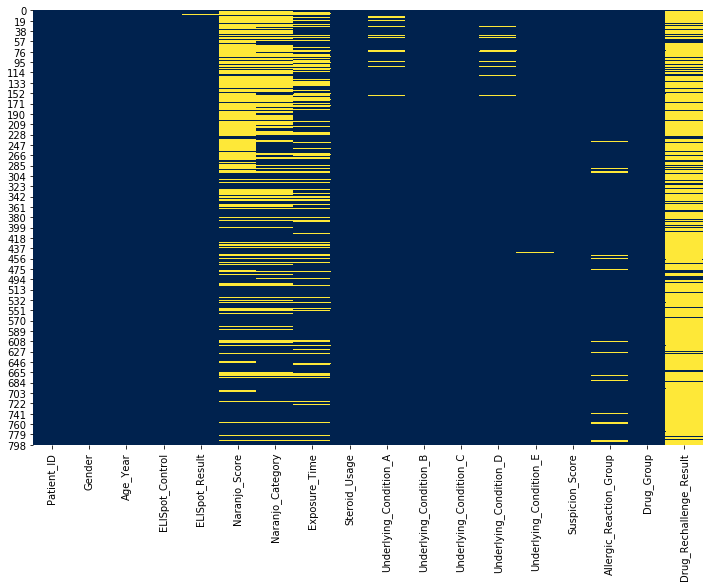

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap = 'cividis');

In [13]:
df.isnull().sum().values.sum()

1582

In [14]:
df.describe(include='all')

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
count,799.000,799.000,799.000,799.000,798.000,431.000,509.000,622.000,799.000,781.000,799.000,799.000,785.000,798.000,799.000,771.000,799.000,114.000
mean,375.078,0.566,51.013,1698.603,11.974,3.237,1.198,428.534,0.354,0.070,0.100,0.123,0.187,0.326,2.081,4.014,3.826,0.246
std,144.888,0.496,22.345,879.909,51.111,1.797,0.519,3922.749,0.479,0.256,0.300,0.328,0.390,0.469,0.381,2.314,2.514,0.432
min,2.000,0.000,0.000,60.000,0.000,-3.000,0.000,-9.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000
25%,318.000,0.000,36.000,1120.000,0.000,2.000,1.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2.000,1.000,0.000
50%,403.000,1.000,53.000,1592.000,0.000,3.000,1.000,10.500,0.000,0.000,0.000,0.000,0.000,0.000,2.000,4.000,3.000,0.000
75%,486.000,1.000,70.000,2166.000,0.000,4.000,1.000,21.000,1.000,0.000,0.000,0.000,0.000,1.000,2.000,6.000,7.000,0.000
max,570.000,1.000,97.000,5290.000,554.000,9.000,3.000,43281.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,8.000,8.000,1.000


# a.) Univariate selection 
**Chi-Square Test:** In general term, this method is used to test the independence of two events. If a dataset is given for two events, we can get the observed count and the expected count and this test measures how much both the counts are derivate from each other.

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549804/Image1_c4jcxi.png)

| Feature(X)\Response(y) | Continuous            | Categorical |   |
|------------------------|-----------------------|-------------|---|
| **Continuous**         | Pearson's Correlation | LDA         |   |
| **Categorical**        | ANOVA                 | Chi-Square  |   |

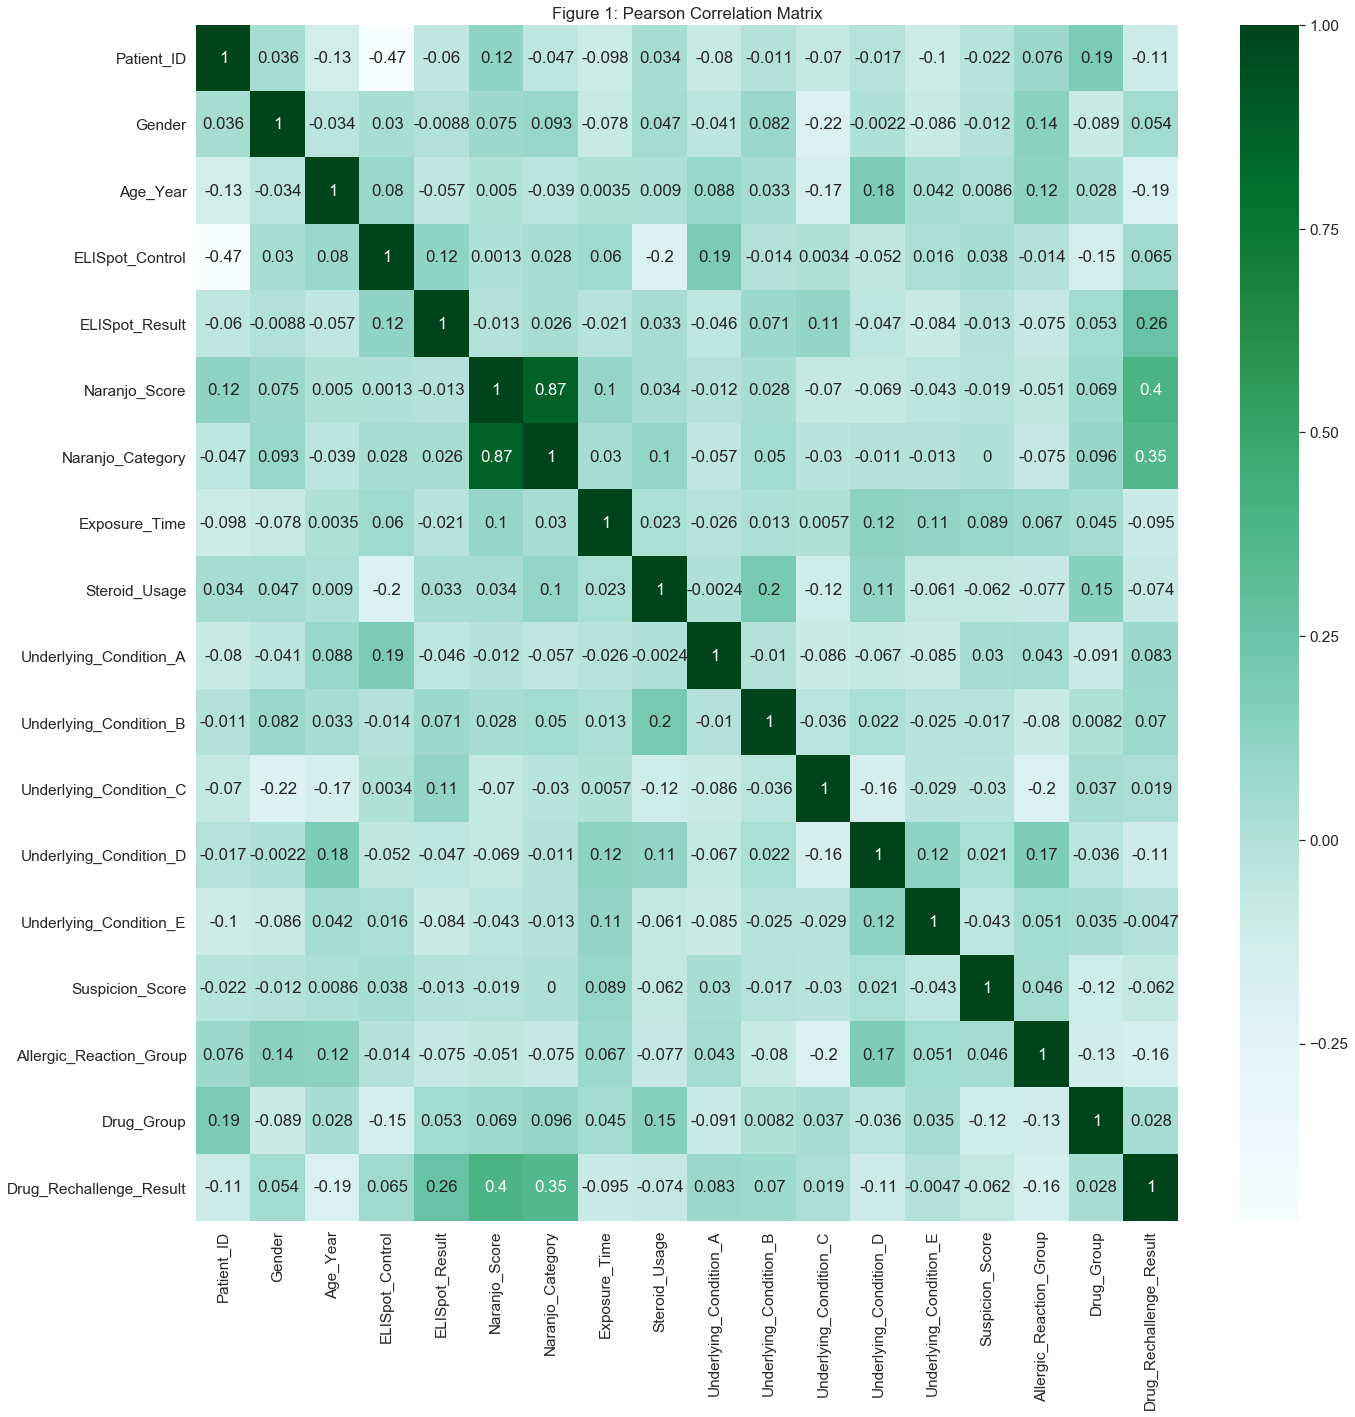

In [15]:
plt.figure(figsize=(22,22)) 
sns.set(font_scale=1.4)
plt.title('Figure 1: Pearson Correlation Matrix')
sns.heatmap(df.corr(), annot=True, cmap='BuGn')

In [16]:
import matplotlib
print ( "Matplotlib", matplotlib.__version__ )

Matplotlib 3.0.3


In [17]:
def chi2_indtest(df_feature, df_target, pvalue = 0.05, verbose =0):
    
    feature_list_chi = []
    feature_list_chi_score = []
    for series in df_feature:
        nl = "\n"

        crosstab = pd.crosstab(df_feature[series], df_target.values.ravel())
        if verbose: print(crosstab, nl)
        chi2, p, dof, expected = chi2_contingency(crosstab)
        if verbose: print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
        if p < pvalue:
            feature_list_chi.append(series)
            feature_list_chi_score.append(chi2)
    return feature_list_chi, feature_list_chi_score

def plot_feature_importances(df, threshold = 0.90, normalized = True):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index(drop=True)
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    colors = ['b', 'g', 'r', 'c', 'm', 'y','#4ef7ae','#d96d09', '#2b9900','#f7184d', '#1b5c44','#f25e60','#e59400']

    if normalized:
        ax.barh(list(reversed(list(df.index[:15]))), 
                df['importance_normalized'].head(15), 
                align = 'center', edgecolor = 'k',color = colors)
        plt.xlabel('Normalized Importance')
    else:
        ax.barh(list(reversed(list(df.index[:15]))), 
                df['importance'].head(15), 
                align = 'center', edgecolor = 'k',color = colors)
        plt.xlabel('Importance')
        # Set the xticks format
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(int(x))))
        
#     for i, v in enumerate(df['importance_normalized'].head(15)):
#         ax.text(v + 0.001, i , '{:.4f}'.format(v), color='blue', fontweight='bold')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    
    
    # Plot labeling
    plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    n_fea = len(df)
    ax.plot(np.arange(n_fea)+1, df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    
    if threshold:
        # Index of minimum number of features needed for cumulative importance threshold
        # np.where returns the index so need to add 1 to have correct number
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        plt.vlines(x = importance_index + 1, ymin = 0, ymax = threshold, 
                   linestyles='--', colors = 'blue' )
        plt.text(importance_index +0.02*n_fea, 0, str(importance_index + 1), color='red', fontweight='bold')
        plt.text(importance_index +0.05*n_fea, threshold, str(threshold*100)+'%', color='orange', fontweight='bold')
        plt.show();

    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

    
    return df

In [18]:
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nUnique values :  \n",n_uniq)


Features : 
 ['Patient_ID', 'Gender', 'Age_Year', 'ELISpot_Control', 'ELISpot_Result', 'Naranjo_Score', 'Naranjo_Category', 'Exposure_Time', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group', 'Drug_Rechallenge_Result']

Unique values :  
 Patient_ID                 298
Gender                     2  
Age_Year                   94 
ELISpot_Control            261
ELISpot_Result             77 
Naranjo_Score              13 
Naranjo_Category           4  
Exposure_Time              77 
Steroid_Usage              2  
Underlying_Condition_A     2  
Underlying_Condition_B     2  
Underlying_Condition_C     2  
Underlying_Condition_D     2  
Underlying_Condition_E     2  
Suspicion_Score            3  
Allergic_Reaction_Group    8  
Drug_Group                 8  
Drug_Rechallenge_Result    2  
dtype: int64


In [19]:
category_feature = ['Gender','Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']
target = ['Drug_Rechallenge_Result']

In [20]:
start = time()
pvalue = 1.00 
feature_list_chi, feature_list_chi_score = chi2_indtest(df[category_feature],df[target], pvalue = pvalue)
t = time() - start
print('Execution time = ', t, ' seconds')

print('Select only IMPORTANT feature which p-value less than', pvalue)
print('Number of IMPORTANT feature for Prediction:', len(feature_list_chi), '\n',feature_list_chi)

Execution time =  0.18395709991455078  seconds
Select only IMPORTANT feature which p-value less than 1.0
Number of IMPORTANT feature for Prediction: 11 
 ['Gender', 'Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']


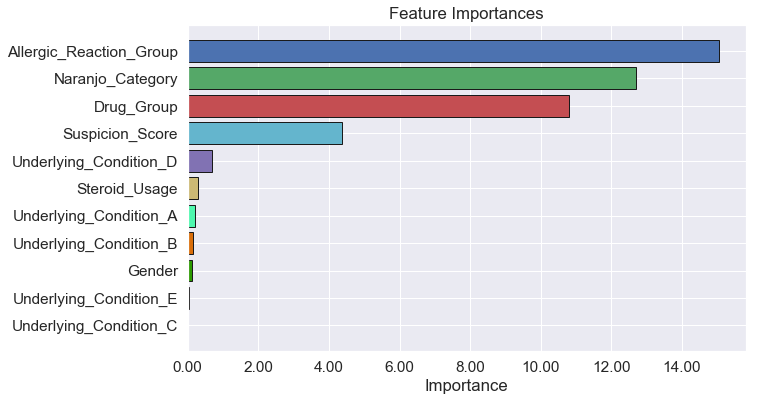

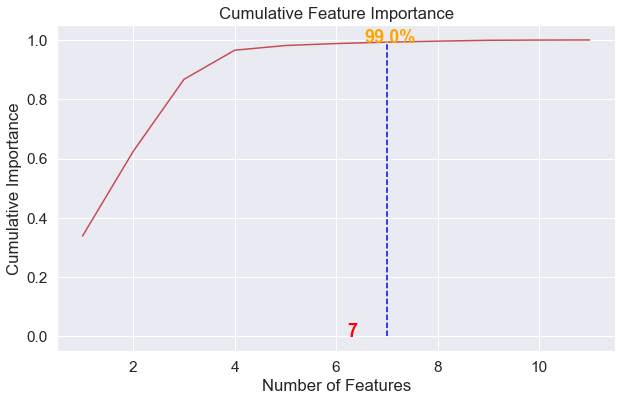

7 features required for 0.99 of cumulative importance


In [21]:
df_Chi2_feaimp = pd.DataFrame({'feature': feature_list_chi, 
                               'importance': feature_list_chi_score})\
                                .sort_values('importance', ascending = False)

df_Chi2_feaimp_norm = plot_feature_importances(df_Chi2_feaimp, threshold= 0.99, normalized=False)

In [22]:
category_feature = ['Gender','Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']
print(category_feature)
category_feature.remove('Naranjo_Category')
print(category_feature)

['Gender', 'Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']
['Gender', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']


In [23]:
start = time()
pvalue = 0.05
feature_list_chi, feature_list_chi_score = chi2_indtest(df[category_feature],df['Naranjo_Category'], pvalue = pvalue)
t = time() - start
print('Execution time = ', t, ' seconds')

print('Select only IMPORTANT feature which p-value less than', pvalue)
print('Number of IMPORTANT feature for Prediction:', len(feature_list_chi), '\n',feature_list_chi)

Execution time =  0.1995089054107666  seconds
Select only IMPORTANT feature which p-value less than 0.05
Number of IMPORTANT feature for Prediction: 5 
 ['Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_D', 'Allergic_Reaction_Group', 'Drug_Group']


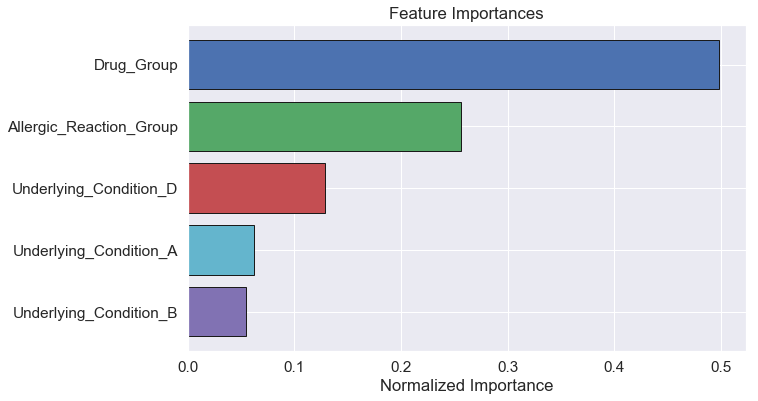

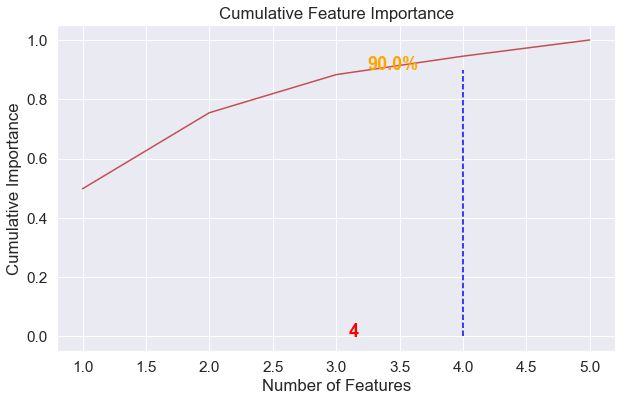

4 features required for 0.90 of cumulative importance


In [24]:
df_Chi2_feaimp = pd.DataFrame({'feature': feature_list_chi, 
                               'importance': feature_list_chi_score})\
                                .sort_values('importance', ascending = False)

df_Chi2_feaimp_norm = plot_feature_importances(df_Chi2_feaimp, threshold= 0.90, normalized=True)

# Impute column which having few missing value

In [25]:
# Use statistical imputation technique
df.Underlying_Condition_A.fillna(df.Underlying_Condition_A.mode()[0], inplace=True)
df.Underlying_Condition_D.fillna(df.Underlying_Condition_D.mode()[0], inplace=True)
df.Underlying_Condition_E.fillna(df.Underlying_Condition_E.mode()[0], inplace=True)
df.Allergic_Reaction_Group.fillna(df.Allergic_Reaction_Group.mode()[0], inplace=True)

# Drop 1 row for null value in ELISpot_Result
df.dropna(subset=['ELISpot_Result'], inplace=True)

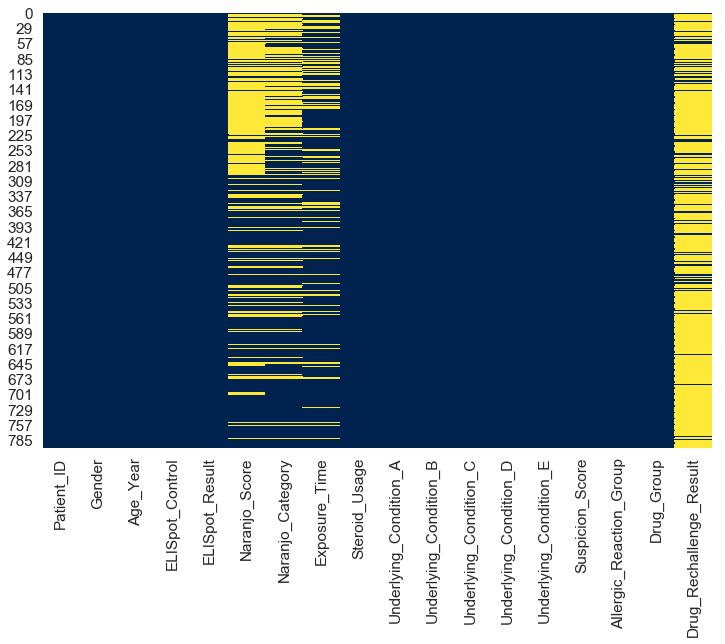

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap = 'cividis');

## Explore  `Naranjo_Score` and `Naranjo_Category` 

In [27]:
labels = [str(i)+': ' + name for i,name in zip(range(4), ['Doubtful', 'Possible', 'Probable', 'Definite'])]
labels

['0: Doubtful', '1: Possible', '2: Probable', '3: Definite']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


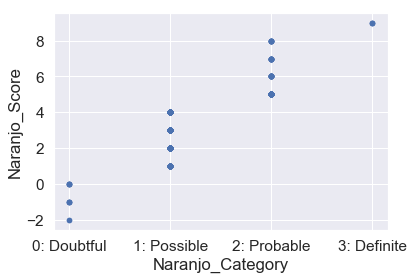

In [28]:
# df.plot(x='Naranjo_Category', y ='Naranjo_Score', c='Drug_Rechallenge_Result', kind='scatter')
ax = df.plot(x='Naranjo_Category', y ='Naranjo_Score', kind='scatter')
ax.set_xticks(range(4));
ax.set_xticklabels(labels);

In [29]:
# Naranjo_Score and Naranjo_Category have high-correlation, which Naranjo Category is a grouping category of Naranjo Score.
# Impute Naranjo_Category by Naranjo_Score
print(df[['Naranjo_Score','Naranjo_Category']].isnull().sum(axis='index'))
df[df[['Naranjo_Score','Naranjo_Category']].isnull().sum(axis='columns') == 1][['Naranjo_Score','Naranjo_Category']]

Naranjo_Score       367
Naranjo_Category    289
dtype: int64


,Naranjo_Score,Naranjo_Category
32,nan,2.000
48,nan,2.000
57,nan,2.000
58,nan,2.000
59,nan,1.000
60,nan,2.000
61,nan,2.000
63,nan,2.000
77,nan,2.000
78,nan,2.000


In [30]:
def Categorize_Naranjo_Score(score):
    if score <= 0:
        return 0
    elif score in range(1,5):
        return 1
    elif score in range(5,9):
        return 2
    elif score in range(9,11):
        return 3
    else:
        return score

# df = pd.read_csv('DrugAllergyKaggle_v3_050720.csv')
# df = df.sort_values(by = 'Patient_ID')
# df['Naranjo_Category'] = df.Naranjo_Score.apply(Categorize_Naranjo_Score) # ใช้ไม่ได้ เพราะจะแปลง cat ให้เป็น nan ด้วย
df.Naranjo_Category.fillna(value = df.Naranjo_Score.apply(Categorize_Naranjo_Score), inplace =True)

# df[df[['Naranjo_Score','Naranjo_Category']].isnull().sum(axis='columns') == 1][['Naranjo_Score','Naranjo_Category']]
df.iloc[493:494,:][['Naranjo_Score','Naranjo_Category']]

,Naranjo_Score,Naranjo_Category
494,3.000,1.000


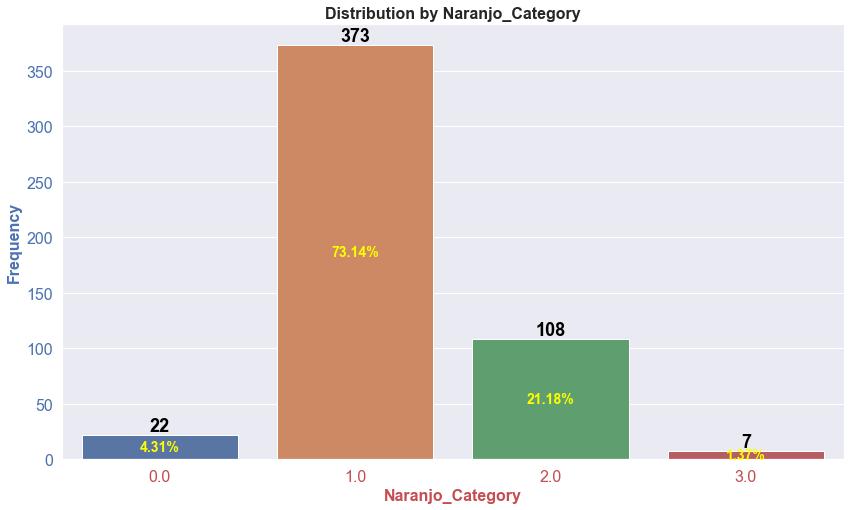

In [31]:
percent_countplot(df, col_name='Naranjo_Category',topn=0, dropna=True)
# sns.countplot(df.Naranjo_Category)
# df['Naranjo_Category'].value_counts(dropna=False).sort_index()

In [32]:
df.isnull().sum().values.sum()

1515

In [33]:
# We can drop Naranjo_Score now
df.drop('Naranjo_Score', axis=1 ,inplace=True)

# One Hot Encoder & Oversampling

In [34]:
# Before we use 'get_dummies' function we have to convert data type of all feature to be 'category' 
def cvt_type(df, col_list, dtype = 'category'):
    for col in col_list:
        df[col] = df[col].astype('category')
    return df

In [35]:
def makeOverSamplesADASYN(X,y):
    from imblearn.over_sampling import ADASYN
    """
    Purpose
    ----------
    Increasing the observation of minority class 

    Parameters
    ----------
    X: Independent Variable in DataFrame
    y: Dependent Variable in Pandas DataFrame format
    Returns:
    ----------
    Returns Independent and Dependent with resampling minarity class
    """
    X_resampled, y_resampled = ADASYN().fit_sample(X, y)
    return(X_resampled, y_resampled)

In [36]:
feature_list_chi

['Underlying_Condition_A',
 'Underlying_Condition_B',
 'Underlying_Condition_D',
 'Allergic_Reaction_Group',
 'Drug_Group']

In [37]:
# Define feature
print('Original data: ', df.shape)
df_temp_Naranjo_Category = df[feature_list_chi + ['Naranjo_Category']].copy()
df_train = df_temp_Naranjo_Category.dropna(subset = ['Naranjo_Category'])

# Store unknown Naranjo_Category to df_unk
NaN_index = df_temp_Naranjo_Category[~df.index.isin(df_train.index)].index
df_unk = df_temp_Naranjo_Category.loc[NaN_index] # Select index that not in df_train


# Drop na row
df_train = df_temp_Naranjo_Category.dropna()
print('df_train dropna: ', df_train.shape)
print('Unknown Naranjo: ', df_unk.shape)

# Focus only Naranjo_Category class 1&2
df_train_w1_2 = df_train[df_train.Naranjo_Category.isin([1,2])]
print('Naranjo Cat1&2: ', df_train_w1_2.shape)

# Convert data type to category
df_train_cvt = cvt_type(df_train_w1_2, col_list=feature_list_chi)
X_data = df_train_cvt.drop('Naranjo_Category', axis= 1)
y_data = df_train_cvt[['Naranjo_Category']]

df_unk_cvt = cvt_type(df_unk, col_list=feature_list_chi)
X_unk_data = df_unk_cvt.drop('Naranjo_Category', axis= 1)

# Get dummies
X_encoded = pd.get_dummies(X_data, prefix_sep='_', drop_first=False)
X_unk_encoded = pd.get_dummies(X_unk_data, prefix_sep='_', drop_first=False)
print('Train encode: ', X_encoded.shape)
print('Class shape: ', y_data.shape)
print('Unknown encode: ', X_unk_encoded.shape)

Original data:  (798, 17)
df_train dropna:  (510, 6)
Unknown Naranjo:  (288, 6)
Naranjo Cat1&2:  (481, 6)
Train encode:  (481, 22)
Class shape:  (481, 1)
Unknown encode:  (288, 22)


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [38]:
X_resampled, y_resampled = makeOverSamplesADASYN(X_encoded,y_data)
print(y_resampled['Naranjo_Category'].value_counts())

from sklearn.linear_model import LogisticRegression
LogReg_clf = LogisticRegression(random_state=7, fit_intercept=False)
LogReg_clf.fit(X_resampled, y_resampled)
print(accuracy_score(LogReg_clf.predict(X_resampled),y_resampled))
print(classification_report(LogReg_clf.predict(X_resampled),y_resampled))

Using TensorFlow backend.


2.000    383
1.000    373
Name: Naranjo_Category, dtype: int64
0.6322751322751323
              precision    recall  f1-score   support

         1.0       0.66      0.62      0.64       395
         2.0       0.61      0.65      0.63       361

    accuracy                           0.63       756
   macro avg       0.63      0.63      0.63       756
weighted avg       0.63      0.63      0.63       756



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
# Test with data before oversampling
print(classification_report(LogReg_clf.predict(X_encoded),y_data))

              precision    recall  f1-score   support

         1.0       0.66      0.76      0.70       324
         2.0       0.27      0.18      0.22       157

    accuracy                           0.57       481
   macro avg       0.46      0.47      0.46       481
weighted avg       0.53      0.57      0.54       481



In [40]:
df_unk.isnull().sum()

Underlying_Condition_A     0  
Underlying_Condition_B     0  
Underlying_Condition_D     0  
Allergic_Reaction_Group    0  
Drug_Group                 0  
Naranjo_Category           288
dtype: int64

In [41]:
LogReg_clf.predict(X_unk_encoded)

array([1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       2., 2., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 2., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1.,
       2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 2., 2., 1., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 1., 1., 2., 2., 1., 2., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [45]:
df['Naranjo_Category'][NaN_index] = LogReg_clf.predict(X_unk_encoded) #df_unk_impute.Naranjo_Category
df.Naranjo_Category.isnull().sum()
# df.loc[NaN_index].head()

/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

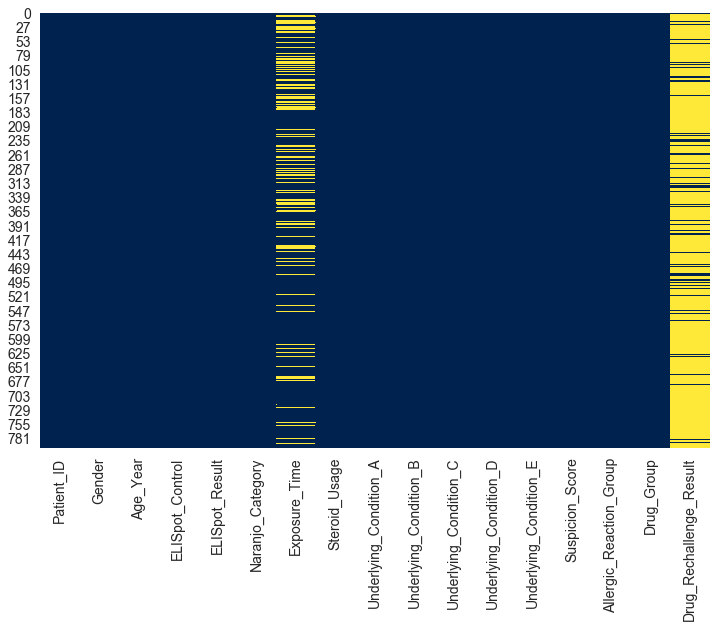

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap = 'cividis');

# Explore `ELISpot_Control` and `ELISpot_Result`

In [47]:
df.head()

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
0,2,1,26,2504,0.000,1.000,31.000,1,0.000,0,0,0.000,0.000,2,2.000,2,nan
1,7,0,75,1868,51.000,2.000,1.000,0,0.000,0,0,0.000,0.000,2,6.000,4,1.000
2,13,0,81,1617,10.000,2.000,19.000,1,1.000,0,0,1.000,1.000,2,5.000,1,nan
3,13,0,81,1617,10.000,2.000,19.000,1,1.000,0,0,1.000,1.000,2,5.000,3,nan
4,18,1,60,3136,0.000,2.000,nan,0,0.000,0,0,1.000,1.000,3,8.000,1,nan


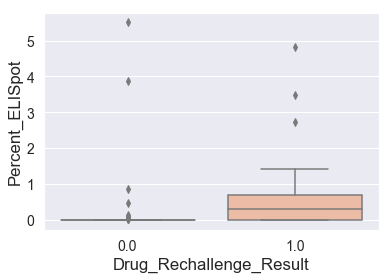

In [48]:
df['Percent_ELISpot'] = df.ELISpot_Result / df.ELISpot_Control *100
# df[df.Drug_Rechallenge_Result == 1]
# sns.boxplot(x="Drug_Rechallenge_Result", y="Percent_ELISpot",data=df, palette="coolwarm")
# remove outlier
sns.boxplot(x="Drug_Rechallenge_Result", y="Percent_ELISpot",data=df[df['Percent_ELISpot']<10], palette="coolwarm")

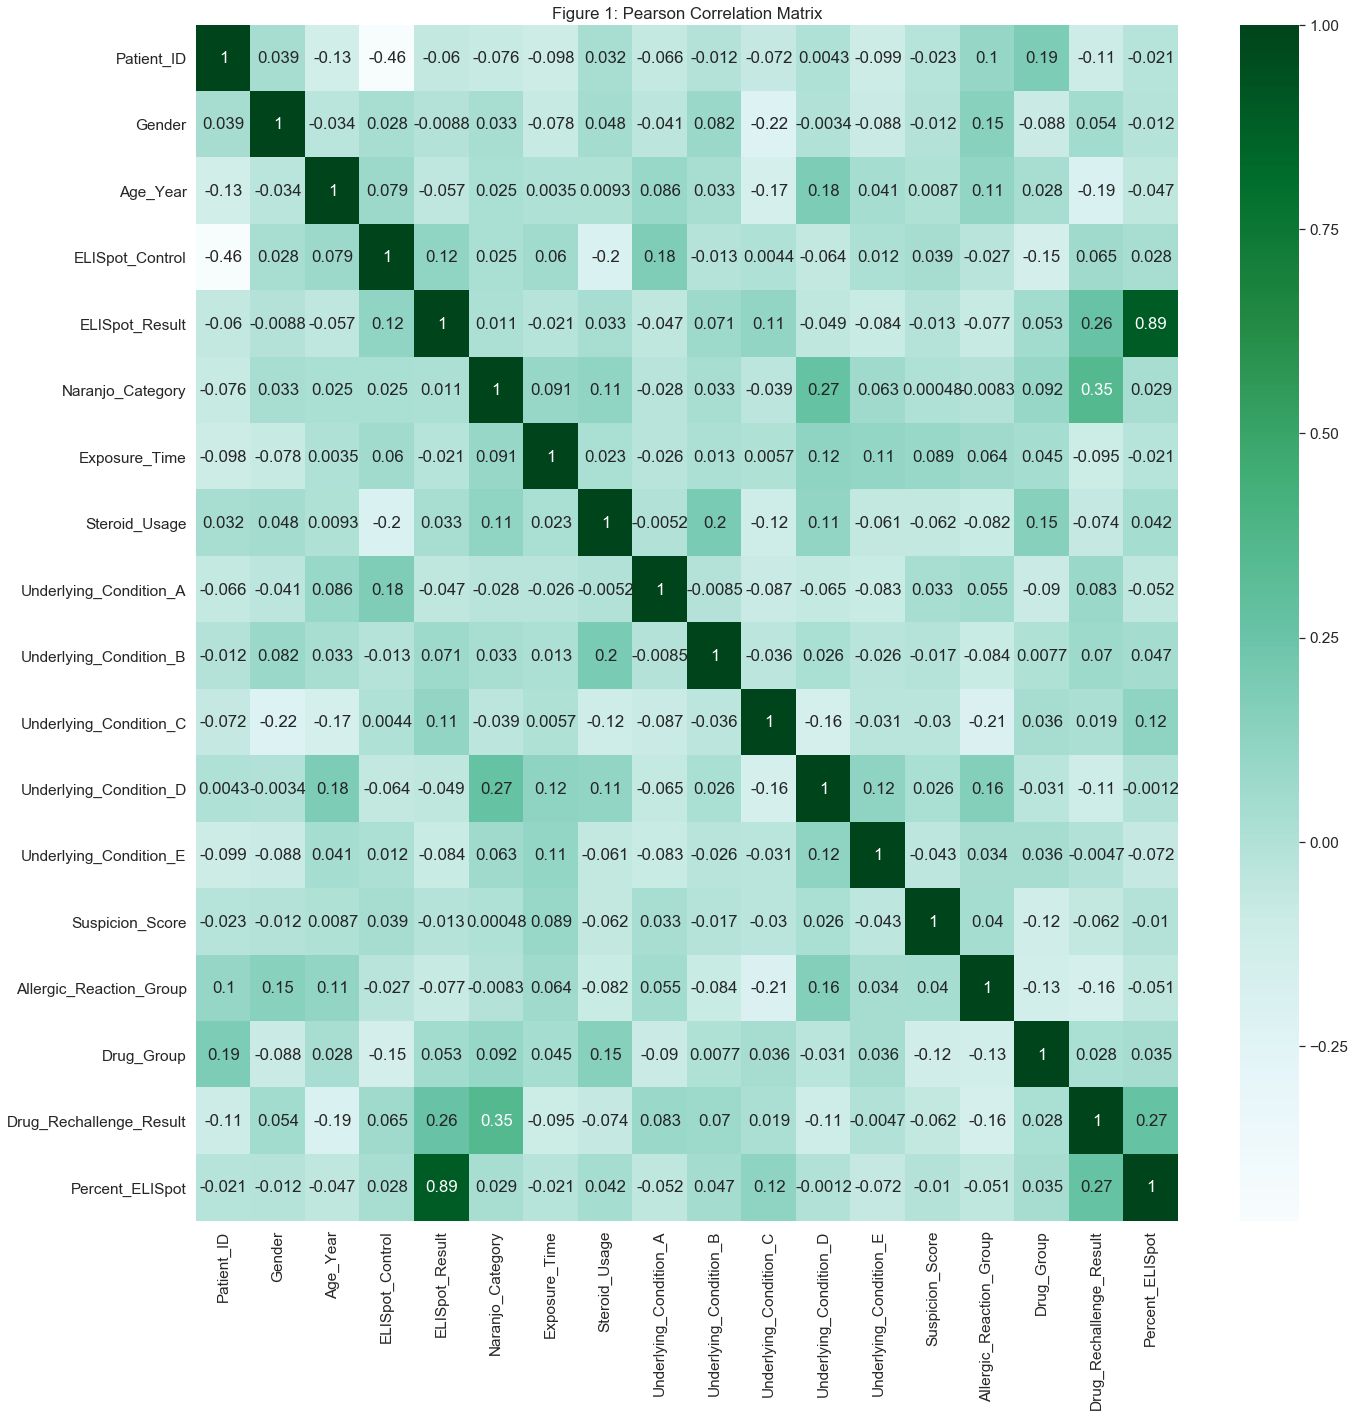

In [49]:
plt.figure(figsize=(22,22)) 
sns.set(font_scale=1.4)
plt.title('Figure 1: Pearson Correlation Matrix')
sns.heatmap(df.corr(), annot=True, cmap='BuGn')

# Explore `Exposure_Time`

In [50]:
Exposure_Time_corr = df.corr()[['Exposure_Time']]
Exposure_Time_corr[np.abs(Exposure_Time_corr.Exposure_Time) > 0.1]

,Exposure_Time
Exposure_Time,1.000
Underlying_Condition_D,0.123
Underlying_Condition_E,0.108


In [51]:
target = ['Drug_Rechallenge_Result']

selected_feature = df.columns.tolist()
selected_feature.remove('Patient_ID')
selected_feature.remove('Percent_ELISpot')
selected_feature.remove('Drug_Rechallenge_Result')
print(selected_feature)

['Gender', 'Age_Year', 'ELISpot_Control', 'ELISpot_Result', 'Naranjo_Category', 'Exposure_Time', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']


In [52]:
df_Exposure_Time = df[selected_feature].copy()
df_Exposure_Time.head()

,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group
0,1,26,2504,0.000,1.000,31.000,1,0.000,0,0,0.000,0.000,2,2.000,2
1,0,75,1868,51.000,2.000,1.000,0,0.000,0,0,0.000,0.000,2,6.000,4
2,0,81,1617,10.000,2.000,19.000,1,1.000,0,0,1.000,1.000,2,5.000,1
3,0,81,1617,10.000,2.000,19.000,1,1.000,0,0,1.000,1.000,2,5.000,3
4,1,60,3136,0.000,2.000,nan,0,0.000,0,0,1.000,1.000,3,8.000,1


In [53]:
df_Exposure_Time.isnull().sum()

Gender                     0  
Age_Year                   0  
ELISpot_Control            0  
ELISpot_Result             0  
Naranjo_Category           0  
Exposure_Time              176
Steroid_Usage              0  
Underlying_Condition_A     0  
Underlying_Condition_B     0  
Underlying_Condition_C     0  
Underlying_Condition_D     0  
Underlying_Condition_E     0  
Suspicion_Score            0  
Allergic_Reaction_Group    0  
Drug_Group                 0  
dtype: int64

In [54]:
df_Exposure_Time = df[selected_feature].copy()
df_ExT_train = df_Exposure_Time.dropna(subset = ['Exposure_Time'])
df_ExT_unk = df_Exposure_Time.iloc[~df.index.isin(df_ExT_train.index)] # Select index that not in df_train
print(df.shape)
print(df_ExT_train.shape)

# Drop na row
df_ExT_train = df_Exposure_Time.dropna()
print(df_ExT_train.shape)
print(df_ExT_unk.shape)

(798, 18)
(622, 15)
(622, 15)
(176, 15)


In [55]:
df_ExT_train.isnull().sum()

Gender                     0
Age_Year                   0
ELISpot_Control            0
ELISpot_Result             0
Naranjo_Category           0
Exposure_Time              0
Steroid_Usage              0
Underlying_Condition_A     0
Underlying_Condition_B     0
Underlying_Condition_C     0
Underlying_Condition_D     0
Underlying_Condition_E     0
Suspicion_Score            0
Allergic_Reaction_Group    0
Drug_Group                 0
dtype: int64

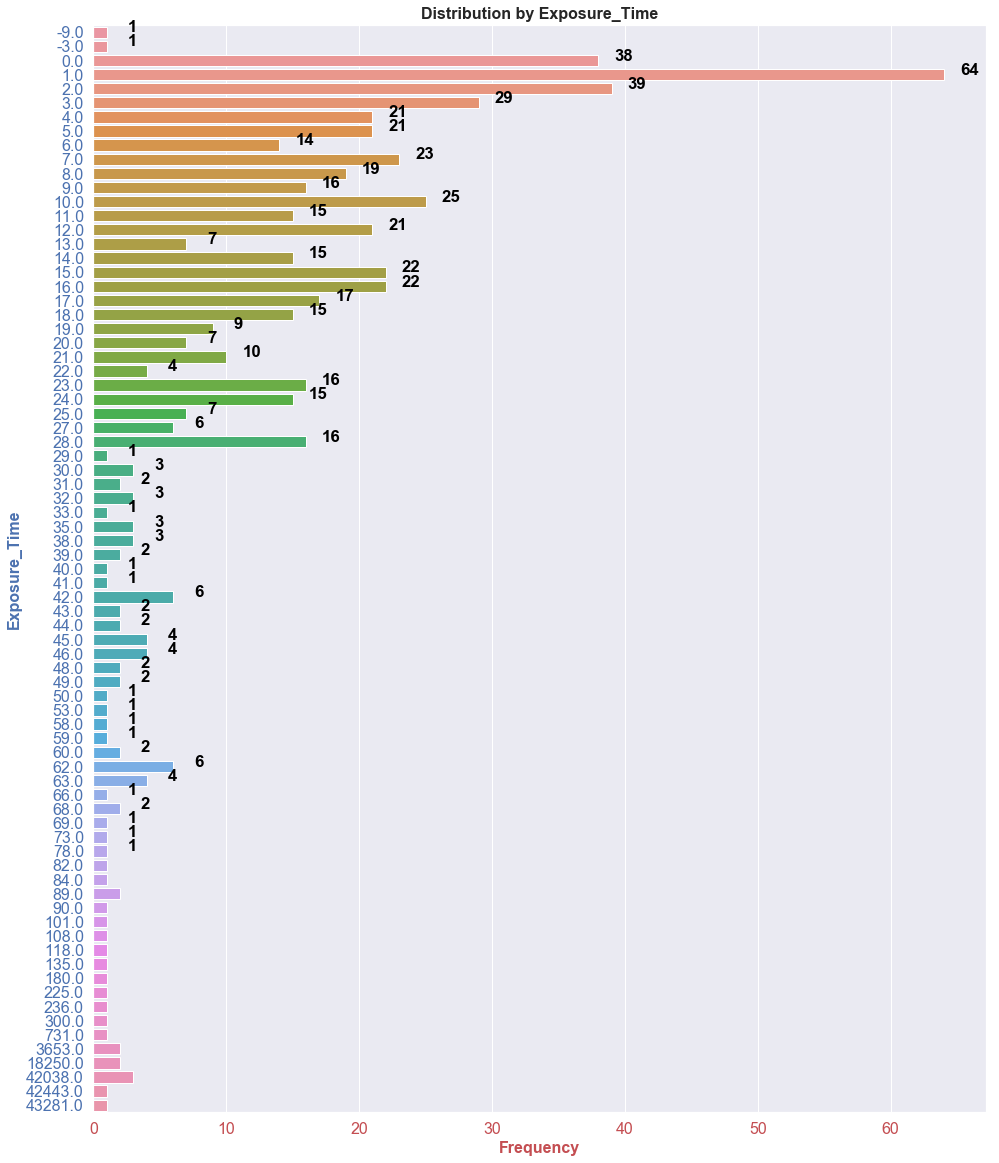

In [56]:
percent_countplot(df_ExT_train, col_name='Exposure_Time', topn=0, figsize=(16,20), annot_percent=False, 
                  orient='h', order_by_value=False)

In [57]:
# Convert negative time to zero

ExT_neg_idx = df_ExT_train[df_ExT_train['Exposure_Time'] < 0][['Exposure_Time']].index

display(df_ExT_train.loc[ExT_neg_idx])

df_ExT_train.Exposure_Time = df_ExT_train.Exposure_Time.apply(lambda x: max(0,x))
df_ExT_train.loc[ExT_neg_idx]

,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group
202,1,56,1664,0.000,1.000,-9.000,1,0.000,1,0,0.000,1.000,2,1.000,8
275,0,13,2060,0.000,0.000,-3.000,0,0.000,0,0,0.000,0.000,2,1.000,1


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group
202,1,56,1664,0.000,1.000,0.000,1,0.000,1,0,0.000,1.000,2,1.000,8
275,0,13,2060,0.000,0.000,0.000,0,0.000,0,0,0.000,0.000,2,1.000,1


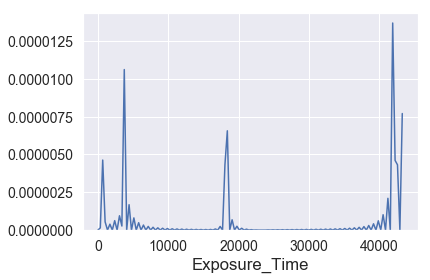

In [58]:
# understanding the data age distribution
sns.distplot(df_ExT_train["Exposure_Time"], bins=np.linspace(0,max(df["Exposure_Time"]),1))

# Linear regression

- Without encoding
    - MAE :   1128.3461173679116
    - MSE :   14454474.237774532
    - RMSE :   3801.9040279542214
    - R2 :   0.05915062311223729

In [59]:
X_ExT = df_ExT_train.drop('Exposure_Time',axis=1)
y_ExT = df_ExT_train[['Exposure_Time']]
print(df_ExT_train.shape)

(622, 15)


In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_ExT, y_ExT)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
from sklearn import metrics

predictions = lm.predict(X_ExT)
y_test = y_ExT

print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 :'," ", metrics.r2_score(y_test,predictions))

MAE :   1126.304625827018
MSE :   14459173.2935311
RMSE :   3802.521964897915
R2 :   0.05884373725563585


# One hot encode

In [62]:
df_ExT_train.columns

Index(['Gender', 'Age_Year', 'ELISpot_Control', 'ELISpot_Result',
       'Naranjo_Category', 'Exposure_Time', 'Steroid_Usage',
       'Underlying_Condition_A', 'Underlying_Condition_B',
       'Underlying_Condition_C', 'Underlying_Condition_D',
       'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group',
       'Drug_Group'],
      dtype='object')

In [63]:
print ("\nUnique values :  \n",n_uniq)


Unique values :  
 Patient_ID                 298
Gender                     2  
Age_Year                   94 
ELISpot_Control            261
ELISpot_Result             77 
Naranjo_Score              13 
Naranjo_Category           4  
Exposure_Time              77 
Steroid_Usage              2  
Underlying_Condition_A     2  
Underlying_Condition_B     2  
Underlying_Condition_C     2  
Underlying_Condition_D     2  
Underlying_Condition_E     2  
Suspicion_Score            3  
Allergic_Reaction_Group    8  
Drug_Group                 8  
Drug_Rechallenge_Result    2  
dtype: int64


In [65]:
cat_col = ['Gender','Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A',
       'Underlying_Condition_B', 'Underlying_Condition_C',
       'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score',
       'Allergic_Reaction_Group', 'Drug_Group']

df_train_cvt = cvt_type(df_ExT_train, col_list=cat_col)
X_ExT = df_train_cvt.drop('Exposure_Time',axis=1)
y_ExT = df_train_cvt[['Exposure_Time']]

# Get dummies
X_ExT_encoded = pd.get_dummies(X_ExT, prefix_sep='_', drop_first=False)
print(X_ExT_encoded.shape)

(622, 40)


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


- With encoding

In [67]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_ExT_encoded, y_ExT)

from sklearn import metrics
predictions = lm.predict(X_ExT_encoded)
y_test = y_ExT

print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 :'," ", metrics.r2_score(y_test,predictions))

MAE :   1283.6256728164326
MSE :   13293775.495693862
RMSE :   3646.063013127154
R2 :   0.1347001789592368


In [68]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept = False)
lm.fit(X_ExT_encoded, y_ExT)

from sklearn import metrics
predictions = lm.predict(X_ExT_encoded)
y_test = y_ExT

print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 :'," ", metrics.r2_score(y_test,predictions))

MAE :   1283.6256728164426
MSE :   13293775.495693864
RMSE :   3646.0630131271546
R2 :   0.1347001789592367


In [69]:
import pandas as pd
import statsmodels.api as sm

'''
Source: https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py
'''

def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

def backward_regression(X, y,
                           threshold_out,
                           verbose=False):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [70]:
fwd_fea = forward_regression(X_ExT_encoded, y_ExT, threshold_in = 0.05)
print(fwd_fea)

lm = LinearRegression()
lm.fit(X_ExT_encoded[fwd_fea], y_ExT)
predictions = lm.predict(X_ExT_encoded[fwd_fea])
y_test = y_ExT

print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 :'," ", metrics.r2_score(y_test,predictions))

['Allergic_Reaction_Group_8.0', 'Drug_Group_8', 'Naranjo_Category_2.0', 'Suspicion_Score_3', 'Gender_1', 'ELISpot_Control', 'Underlying_Condition_E_1.0', 'Underlying_Condition_E_0.0', 'Drug_Group_7']
MAE :   1226.5558232074738
MSE :   13446499.247585159
RMSE :   3666.946856389544
R2 :   0.12475929834010657


In [71]:
bwd_fea = backward_regression(X_ExT_encoded, y_ExT, threshold_out = 0.05)
print(bwd_fea)

lm = LinearRegression()
lm.fit(X_ExT_encoded[bwd_fea], y_ExT)
predictions = lm.predict(X_ExT_encoded[bwd_fea])
y_test = y_ExT

print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 :'," ", metrics.r2_score(y_test,predictions))

['ELISpot_Control', 'Gender_0', 'Naranjo_Category_2.0', 'Underlying_Condition_E_1.0', 'Suspicion_Score_3', 'Allergic_Reaction_Group_8.0', 'Drug_Group_7', 'Drug_Group_8']
MAE :   1226.5558232072165
MSE :   13446499.247585159
RMSE :   3666.946856389544
R2 :   0.12475929834010657


#### Bad result from LinearRegression model
- Try to discretize Exposure_Time and impute value with classifier instead
- Discretize to 4 categories
    - < 1hr (60 min)
    - 1 - 6 hrs (60 - 360 mins)
    - 6 - 24 hrs (360 - 1440 mins)
    - \> 24 hrs (1440 mins)

In [72]:
def discretize_time(time):
    if time < 60:
        return 0 #'less_1hr'
    elif 60 <= time < 360:
        return 1 #'1_6hrs'
    elif 360 <= time < 1440:
        return 2 #'6_24hrs'
    elif time >= 1440:
        return 3 #'over_24hrs'
    else:
        return time
    
df_ExT_train['Ex_Time_group'] = df_ExT_train.Exposure_Time.apply(discretize_time)
df_ExT_train.head()

/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Ex_Time_group
0,1,26,2504,0.000,1.000,31.000,1,0.000,0,0,0.000,0.000,2,2.000,2,0
1,0,75,1868,51.000,2.000,1.000,0,0.000,0,0,0.000,0.000,2,6.000,4,0
2,0,81,1617,10.000,2.000,19.000,1,1.000,0,0,1.000,1.000,2,5.000,1,0
3,0,81,1617,10.000,2.000,19.000,1,1.000,0,0,1.000,1.000,2,5.000,3,0
6,1,60,3136,0.000,2.000,19.000,0,0.000,0,0,1.000,1.000,2,8.000,1,0


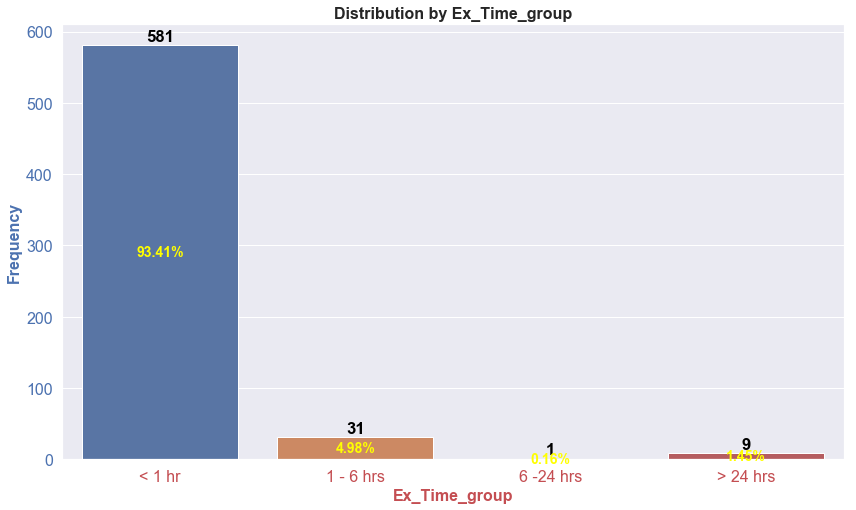

In [73]:
# Exposure_Time in hour unit
ax = percent_countplot(df_ExT_train[["Ex_Time_group"]], col_name='Ex_Time_group', topn=0)

labels = ['< 1 hr', '1 - 6 hrs', '6 -24 hrs', '> 24 hrs']
# https://stackoverflow.com/questions/45056579/is-it-possible-to-format-the-labels-using-set-xticklabels-in-matplotlib
ax.set_xticklabels(labels);

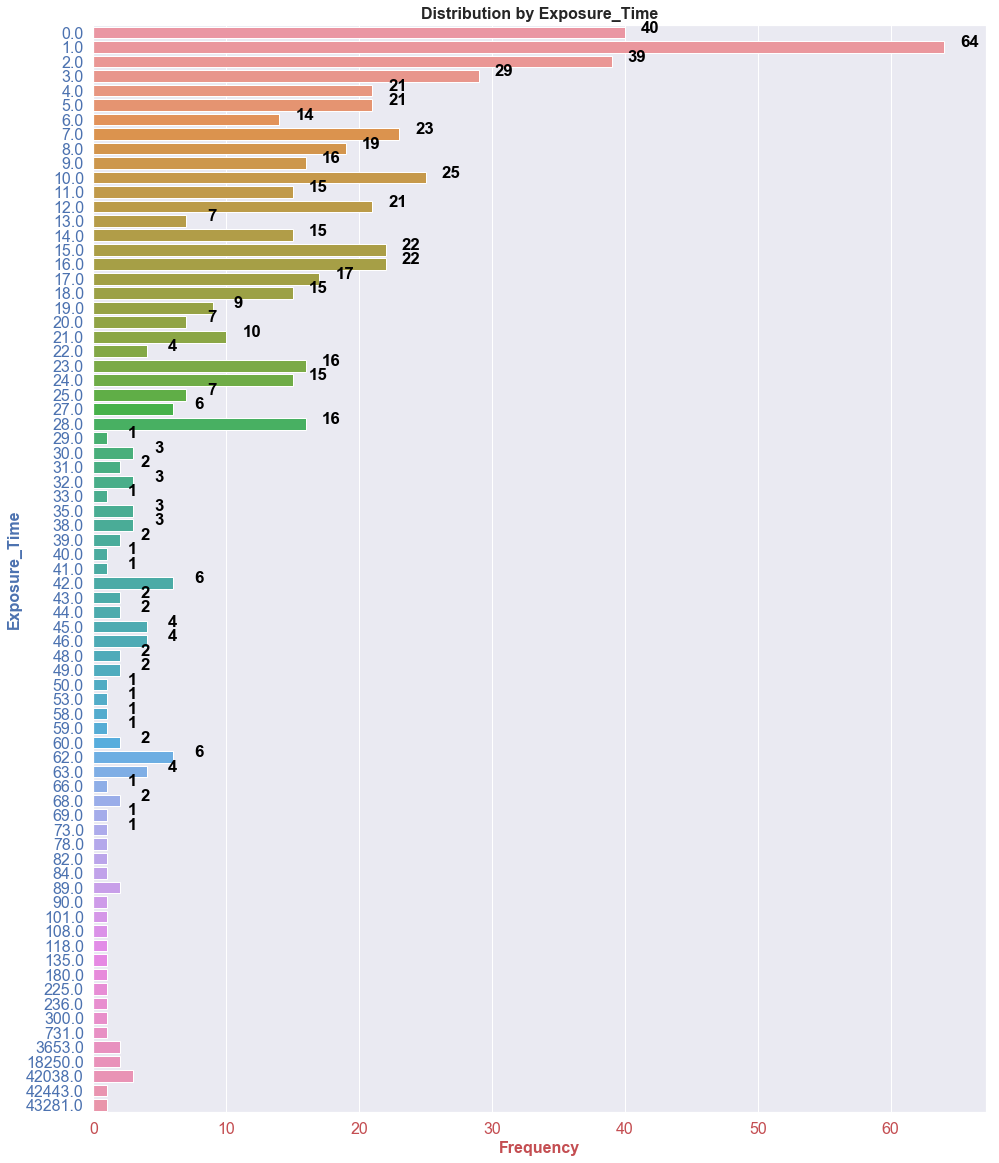

In [74]:
X_ExT = df_ExT_train.drop('Exposure_Time',axis=1)
y_ExT = df_ExT_train[['Exposure_Time']]
percent_countplot(y_ExT, col_name='Exposure_Time', topn=0, figsize=(16,20), annot_percent=False, 
                  orient='h', order_by_value=False)

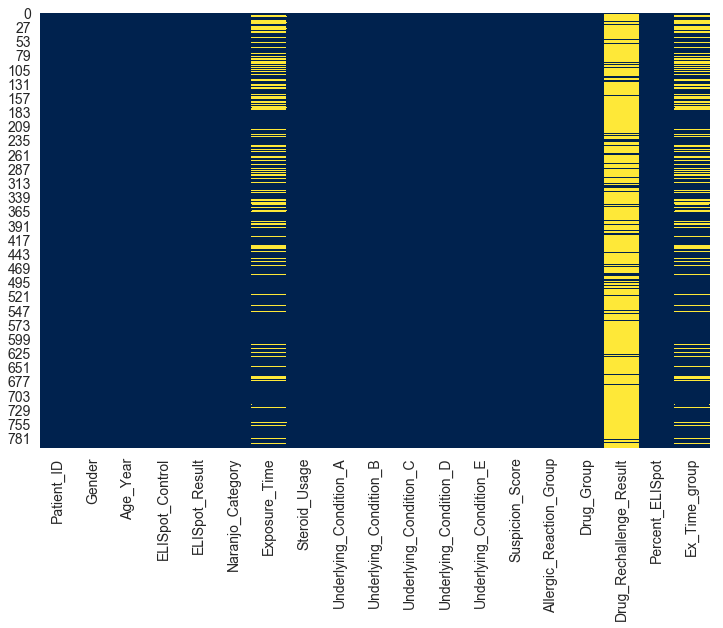

In [75]:
df['Ex_Time_group'] = df.Exposure_Time.apply(discretize_time)
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap = 'cividis');

In [76]:
# Due to linear regression for predict Exposure_Time has low R-square (less than 0.10)
# I decide to use statistical imputation technique instead

df.Ex_Time_group.fillna(df.Ex_Time_group.mode()[0], inplace=True)

In [77]:
# We will use Ex_Time_group instead of Exposure_Time. So, we can drop Exposure_Time now
df.drop('Exposure_Time', axis=1 ,inplace=True)

In [78]:
df.isnull().sum()

Patient_ID                 0  
Gender                     0  
Age_Year                   0  
ELISpot_Control            0  
ELISpot_Result             0  
Naranjo_Category           0  
Steroid_Usage              0  
Underlying_Condition_A     0  
Underlying_Condition_B     0  
Underlying_Condition_C     0  
Underlying_Condition_D     0  
Underlying_Condition_E     0  
Suspicion_Score            0  
Allergic_Reaction_Group    0  
Drug_Group                 0  
Drug_Rechallenge_Result    684
Percent_ELISpot            0  
Ex_Time_group              0  
dtype: int64

In [79]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
# print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
n_uniq = df.nunique()
print ("\nUnique values :  \n",n_uniq)
print ("\nTotal Unique values :  {:,}".format(n_uniq.values.sum()))

Rows     :  798
Columns  :  18

Missing values :   684

Unique values :  
 Patient_ID                 298
Gender                     2  
Age_Year                   94 
ELISpot_Control            260
ELISpot_Result             77 
Naranjo_Category           4  
Steroid_Usage              2  
Underlying_Condition_A     2  
Underlying_Condition_B     2  
Underlying_Condition_C     2  
Underlying_Condition_D     2  
Underlying_Condition_E     2  
Suspicion_Score            3  
Allergic_Reaction_Group    8  
Drug_Group                 8  
Drug_Rechallenge_Result    2  
Percent_ELISpot            188
Ex_Time_group              4  
dtype: int64

Total Unique values :  960


In [80]:
df.Ex_Time_group.fillna(df.Ex_Time_group.mode()[0], inplace=True)

In [81]:
# Use statistical imputation technique
df.Underlying_Condition_A.fillna(df.Underlying_Condition_A.mode()[0], inplace=True)
df.Underlying_Condition_D.fillna(df.Underlying_Condition_D.mode()[0], inplace=True)
df.Underlying_Condition_E.fillna(df.Underlying_Condition_E.mode()[0], inplace=True)
df.Allergic_Reaction_Group.fillna(df.Allergic_Reaction_Group.mode()[0], inplace=True)

# Drop 1 row for null value in ELISpot_Result
df.dropna(subset=['ELISpot_Result'], inplace=True)

In [82]:
df.isnull().sum()

Patient_ID                 0  
Gender                     0  
Age_Year                   0  
ELISpot_Control            0  
ELISpot_Result             0  
Naranjo_Category           0  
Steroid_Usage              0  
Underlying_Condition_A     0  
Underlying_Condition_B     0  
Underlying_Condition_C     0  
Underlying_Condition_D     0  
Underlying_Condition_E     0  
Suspicion_Score            0  
Allergic_Reaction_Group    0  
Drug_Group                 0  
Drug_Rechallenge_Result    684
Percent_ELISpot            0  
Ex_Time_group              0  
dtype: int64

In [83]:
df.shape

(798, 18)